## Importe de librerías

In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Carga de los datasets

In [551]:
df_train = pd.read_csv('Housing Dreams/house_train_raw.csv')
df_test = pd.read_csv('Housing Dreams/houses_test_raw.csv')

## Variables frecuentemente usadas

In [552]:
TARGET= 'SalePrice'

## Preparando del modelo

In [553]:
X= df_train.drop(TARGET, axis=1)
Y= df_train[TARGET]

Electrical       0.052632
MasVnrType       0.421053
MasVnrArea       0.421053
BsmtQual         1.947368
BsmtCond         1.947368
BsmtFinType1     1.947368
BsmtExposure     2.000000
BsmtFinType2     2.000000
GarageCond       4.263158
GarageQual       4.263158
GarageFinish     4.263158
GarageType       4.263158
GarageYrBlt      4.263158
LotFrontage     13.631579
FireplaceQu     36.315789
Fence           62.052632
Alley           72.052632
MiscFeature     74.000000
PoolQC          76.473684
dtype: float64

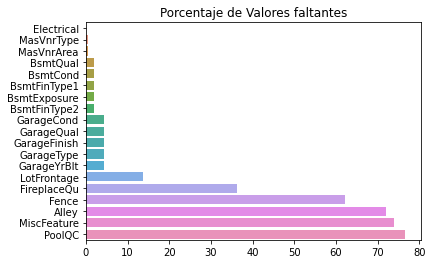

In [554]:
missing_values=df_train.isna().sum()[df_train.isnull().sum() > 0].sort_values(ascending=True)
missing_values_percentage=missing_values[missing_values>0]/missing_values.shape[0]
sns.barplot(x=missing_values_percentage.values,y=missing_values_percentage.index).set_title("Porcentaje de Valores faltantes")
missing_values_percentage

#### Manejo de valores nulos:

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [555]:
df_train.Electrical.fillna(df_train.Electrical.mode()[0], inplace=True)

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [556]:
df_train.MasVnrType.fillna(df_train.MasVnrType.mode()[0], inplace=True)

MasVnrArea: Masonry veneer area in square feet

In [557]:
df_train.MasVnrArea.fillna(df_train.MasVnrArea.mode()[0], inplace=True)

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [558]:
df_train.BsmtQual.fillna(df_train.BsmtQual.mode()[0], inplace=True)

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [559]:
df_train.BsmtCond.fillna(df_train.BsmtCond.mode()[0], inplace=True)

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [560]:
df_train.BsmtCond.fillna(df_train.BsmtCond.mode()[0], inplace=True)

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [561]:
df_train.BsmtFinType2.fillna(df_train.BsmtFinType2.mode()[0], inplace=True)

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [562]:
df_train.BsmtExposure.fillna(df_train.BsmtExposure.mode()[0], inplace=True)

##### Los demás features que tienen un porcentage de valores faltantes mayor o igual a 3%, serán llenados con 'sin_valor'

In [563]:
missing_values_percentage

Electrical       0.052632
MasVnrType       0.421053
MasVnrArea       0.421053
BsmtQual         1.947368
BsmtCond         1.947368
BsmtFinType1     1.947368
BsmtExposure     2.000000
BsmtFinType2     2.000000
GarageCond       4.263158
GarageQual       4.263158
GarageFinish     4.263158
GarageType       4.263158
GarageYrBlt      4.263158
LotFrontage     13.631579
FireplaceQu     36.315789
Fence           62.052632
Alley           72.052632
MiscFeature     74.000000
PoolQC          76.473684
dtype: float64

In [564]:
for col in missing_values_percentage.index:
    df_train[col].fillna('sin_valor', inplace=True)

#### Correlación con respecto al target:

<AxesSubplot:title={'center':'Correlación entre variables y el Target(SalePrice)'}>

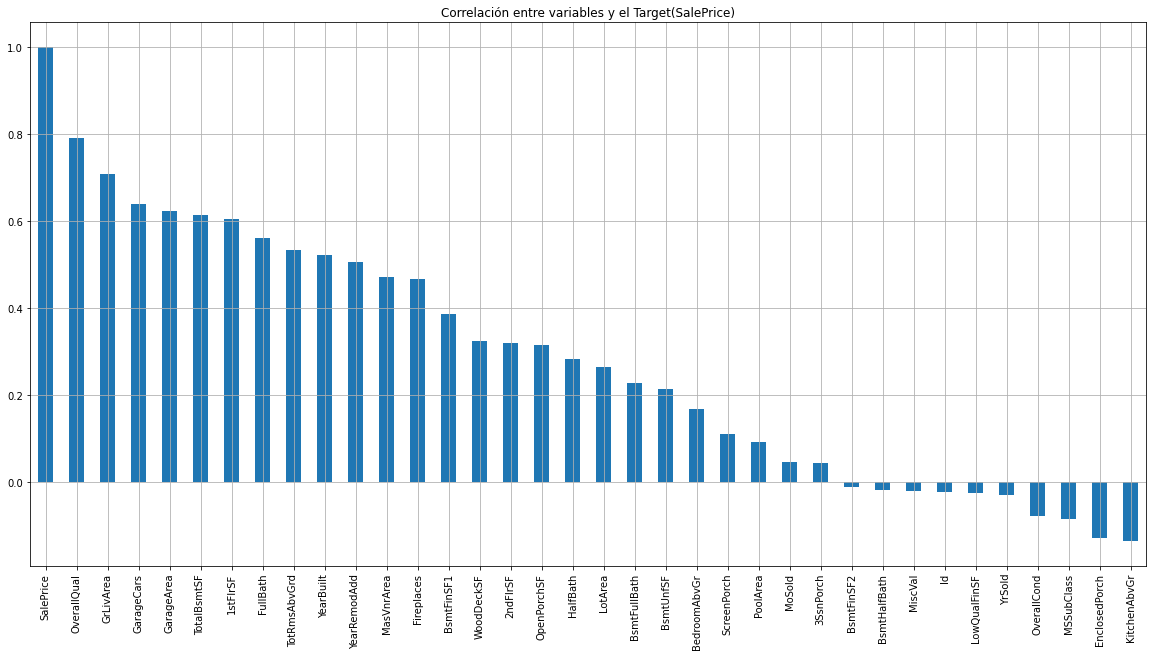

In [565]:
df_train.corrwith(Y).sort_values(ascending=False).plot.bar(figsize=(20,10), title="Correlación entre variables y el Target(SalePrice)",grid=True)

In [566]:
x_cols= df_train.corr()["SalePrice"][df_train.corr().SalePrice > 0.4].drop('SalePrice').index
x_cols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea'],
      dtype='object')

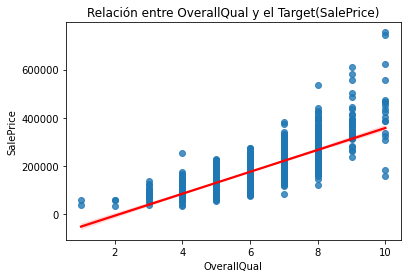

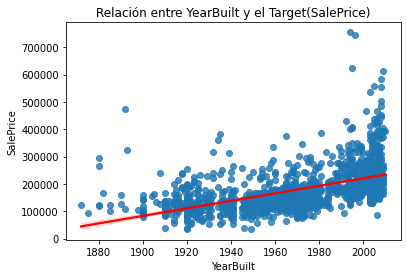

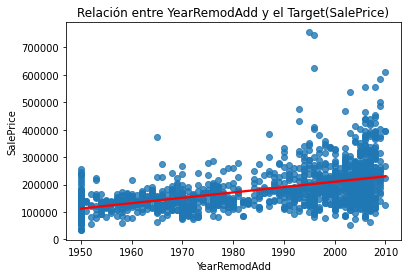

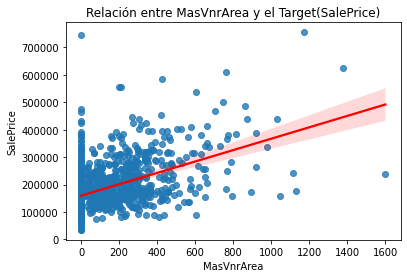

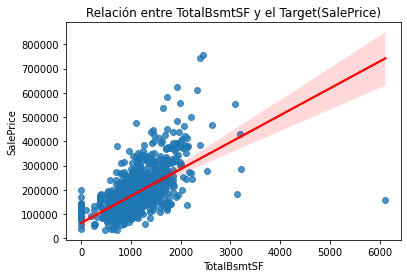

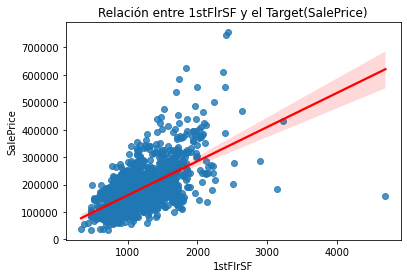

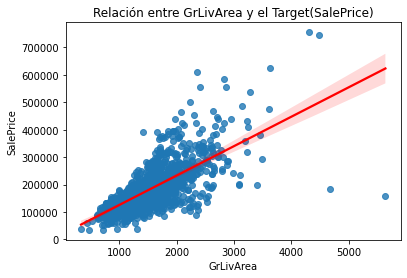

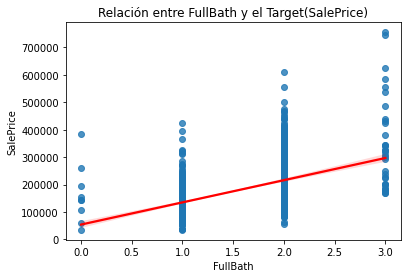

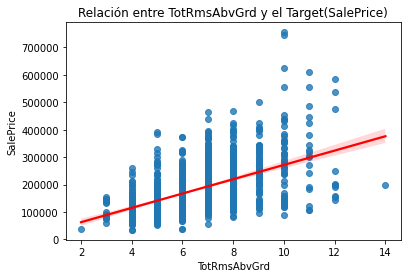

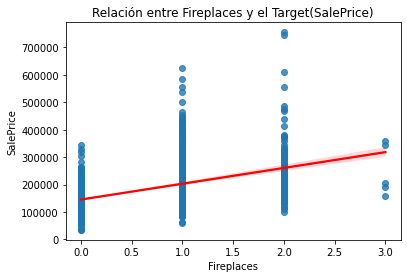

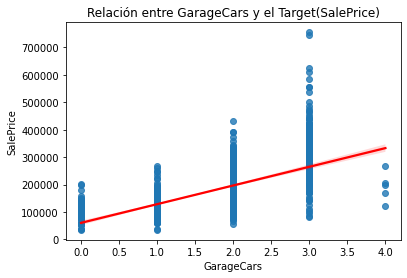

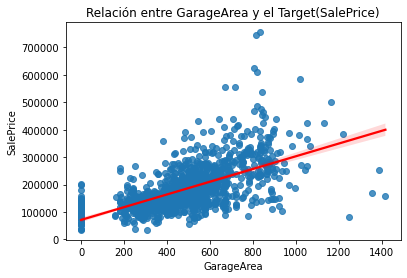

In [567]:
for col in x_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    sns.regplot(x=col, y=TARGET, data=df_train,line_kws={"color": "red"})
    plt.title(f"Relación entre {col} y el Target(SalePrice)")
    plt.show()


### Manejo de outliers:

In [568]:
def detectar_outliers(df:pd.DataFrame,columna:str,tecnica='cajas') -> pd.DataFrame:

    #Detección por medio de Diagrama de Cajas:
    if tecnica == 'cajas':
        q1 = df[columna].describe().loc['25%']
        q3 = df[columna].describe().loc['75%']
        rango_IC = q3 - q1
        minimo = q1 - ((1.5) * (rango_IC))
        maximo = q3 + ((1.5) * (rango_IC))


    #Detección de outliers por medio de las 3 sigmas:
    elif tecnica == 'sigmas':
        promedio = df[columna].mean()
        stddev = df[columna].std()
        maximo = promedio + (3 * stddev)
        minimo = promedio - (3 * stddev)


    df['Outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0
    
    return df

### Entrenamiento del modelo

Actualizo los datos que usaré para entrenar el modelo (usando los features con mayor correlación respecto al target):

In [569]:
X = X[x_cols]
X = df_train[x_cols]

In [570]:
X['Outlier'] = 1
for col in X.columns:
    if col != 'Outlier':
        X = detectar_outliers(X,col)

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_18924\3680577341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Outlier'] = 1
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_18924\928377547.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0
C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_18924\928377547.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [571]:
X = X.values
Y = Y.values

Divido los datos para el entrenamiento y el testeo:

In [572]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Entreno el modelo:

Linear Regression

In [573]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.21848508140923745

In [574]:
np.sqrt(cross_val_score(lr, X, Y, cv=5, scoring='neg_mean_squared_log_error').mean()*-1)

c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_regression.py", line 521, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_valida

nan

Logistic Regression

In [575]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.26658826863493734

In [576]:
r = Ridge()
r.fit(x_train, y_train)
y_pred = r.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.21850319875116897

In [577]:
np.sqrt(cross_val_score(r, X, Y, cv=5, scoring='neg_mean_squared_log_error').mean()*-1)


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_regression.py", line 521, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_valida

nan

In [578]:
l = Lasso()
l.fit(x_train, y_train)
y_pred = l.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.21848513184233642

In [579]:
np.sqrt(cross_val_score(l, X, Y, cv=5, scoring='neg_mean_squared_log_error').mean()*-1)


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_regression.py", line 521, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_valida

nan

In [580]:
en = ElasticNet()
en.fit(x_train, y_train)
y_pred = en.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.21883657207667873

In [581]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.19745680604951732

In [582]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.24538577878718565

In [583]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.2084982813323153

In [584]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.22600885114304442

In [586]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
mean_squared_log_error(y_test, y_pred, squared=False)

0.19859275577656832

In [589]:
cvs = np.sqrt(cross_val_score(RandomForestClassifier(n_estimators=40), X, Y,scoring='neg_mean_squared_log_error').mean()*-1)


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [590]:
cvs

0.2186857923682808

LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, SGDRegressor